# GAN-AE
Notebook with an exploration of the input and output of the GAN-AE algorithm
## Input
The pre-processed files have been donwloaded from [this link](https://onedrive.live.com/?authkey=%21APNzARJylhUVxt0&id=2C3CDD05B333D5E2%214457&cid=2C3CDD05B333D5E2). However, one can pre-process the data with the information on [this repository](https://gitlab.cern.ch/idinu/lhc-olympics-preprocessing/-/tree/master)

In [3]:
# Importing the main libraries
import pandas as pd
import numpy as np
import h5py
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib

**IMPORTANT**: First I'll run the last cell. I copied some benchtools functions because I don't plan on having different labels for comparing the classification models

Then I'm going to read the pre-processed files for the RnD dataset:

In [2]:
df_bkg = pd.read_hdf('..\data\merged\\bkgHLF_merged_BB1.h5')
df_sig=pd.read_hdf('..\data\merged\sigHLF_merged_BB1.h5')

# All have the same columns
df_bkg.columns

Index(['pt1', 'eta1', 'phi1', 'E1', 'm1', 'nc1', 'nisj1', 'nesj1', '1tau1',
       '2tau1', '3tau1', '32tau1', '21tau1', 'pt2', 'eta2', 'phi2', 'E2', 'm2',
       'nc2', 'nisj2', 'nesj2', '1tau2', '2tau2', '3tau2', '32tau2', '21tau2',
       'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1',
       'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1', 'eRing0_2', 'eRing1_2',
       'eRing2_2', 'eRing3_2', 'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2',
       'eRing8_2', 'eRing9_2', 'mjj', 'nj'],
      dtype='object')

In [3]:
# Let's see the shape
print(df_bkg.shape, df_sig.shape)

(999166, 48) (834, 48)


In [4]:
df_bkg.to_hdf('..\data\merged\\bkgHLF_merged_BB1.h5', key='bkg', mode='w')
df_sig.to_hdf('..\data\merged\sigHLF_merged_BB1.h5', key='sig', mode='w')

In [5]:
df_bkg = pd.read_hdf('..\data\merged\\bkgHLF_merged_BB1.h5')
df_sig=pd.read_hdf('..\data\merged\sigHLF_merged_BB1.h5')

# All have the same columns
df_bkg.columns

Index(['pt1', 'eta1', 'phi1', 'E1', 'm1', 'nc1', 'nisj1', 'nesj1', '1tau1',
       '2tau1', '3tau1', '32tau1', '21tau1', 'pt2', 'eta2', 'phi2', 'E2', 'm2',
       'nc2', 'nisj2', 'nesj2', '1tau2', '2tau2', '3tau2', '32tau2', '21tau2',
       'eRing0_1', 'eRing1_1', 'eRing2_1', 'eRing3_1', 'eRing4_1', 'eRing5_1',
       'eRing6_1', 'eRing7_1', 'eRing8_1', 'eRing9_1', 'eRing0_2', 'eRing1_2',
       'eRing2_2', 'eRing3_2', 'eRing4_2', 'eRing5_2', 'eRing6_2', 'eRing7_2',
       'eRing8_2', 'eRing9_2', 'mjj', 'nj'],
      dtype='object')

In [6]:
df_bkg.shape[0]+df_sig.shape[0]

1000000

According to a [presentation](https://www.dropbox.com/s/mml3xk6c4ecd9qr/lhco_lpc%20-%20Ioan%20Dinu.pdf?dl=0) these are the variables
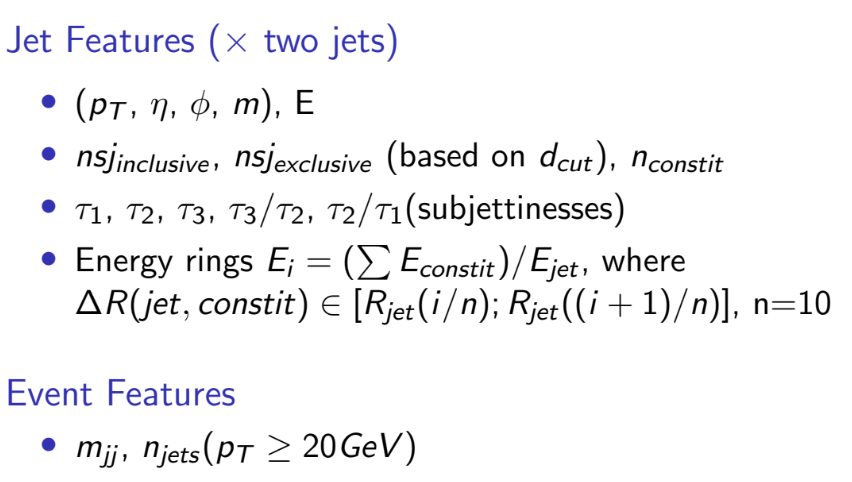 
I'll try to plot some things to understand the data

In [7]:
# I'll add a label variable to plot
df_bkg['label']=0
df_sig['label']=1

df = pd.concat([df_bkg, df_sig])
df.head()

,pt1,eta1,phi1,E1,m1,nc1,nisj1,nesj1,1tau1,2tau1,...,eRing3_2,eRing4_2,eRing5_2,eRing6_2,eRing7_2,eRing8_2,eRing9_2,mjj,nj,label
0,1397.005228,-0.765391,0.537239,1834.490410,170.225610,70,19,66,0.057465,0.035554,...,0.000000,0.001096,0.030870,0.603831,0.086386,0.169597,0.025151,3157.841212,4,0
1,1273.332773,0.354693,-0.951367,1393.391014,327.845663,77,25,71,0.213754,0.089989,...,0.295223,0.038964,0.040332,0.033348,0.012636,0.018853,0.003797,2488.262160,3,0
2,1268.472197,-1.055852,-0.319414,2045.001255,72.622808,21,7,19,0.015388,0.010549,...,0.000000,0.000000,0.000000,0.008479,0.216376,0.750489,0.024656,3499.867409,4,0
3,1414.022037,-0.428495,2.622507,1559.858883,208.706758,81,10,74,0.166379,0.065703,...,0.276864,0.023305,0.014900,0.001381,0.000000,0.000796,0.002166,2729.477504,4,0
4,1220.274012,-0.076185,-1.373332,1235.676617,170.788218,38,17,36,0.039318,0.017604,...,0.000000,0.000000,0.000397,0.000000,0.562971,0.435028,0.001604,2513.728451,4,0


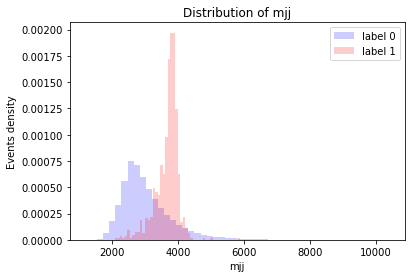

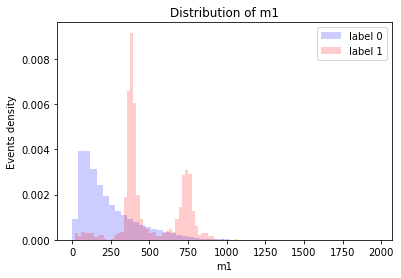

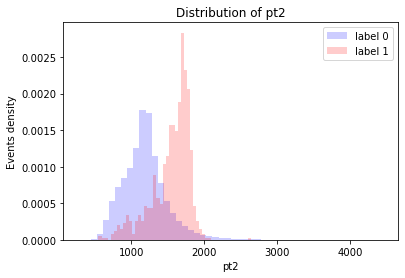

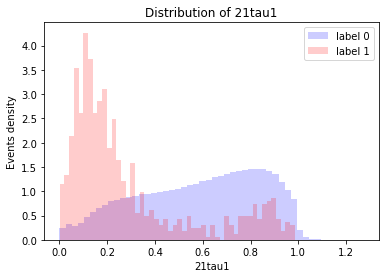

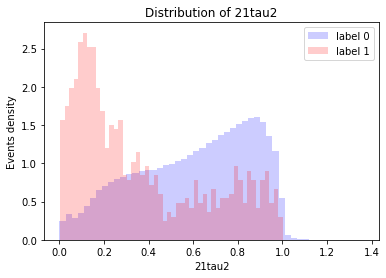

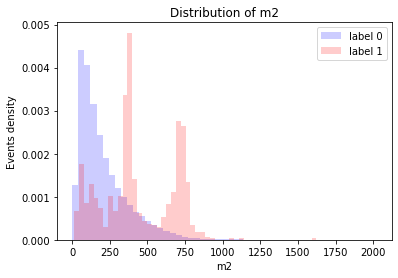

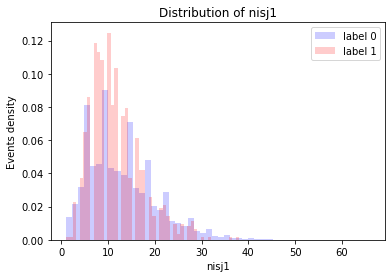

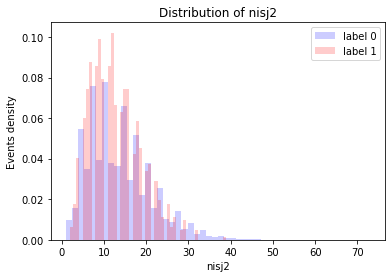

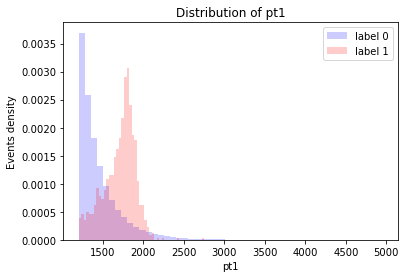

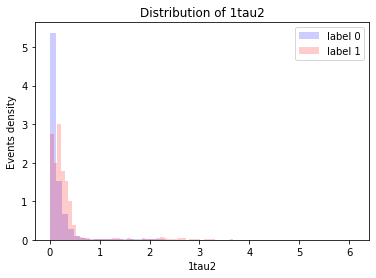

In [54]:
from benchtools.src.plotools import bkg_sig_hist
# I'll list some variables according to 
# the feature importance on the presentation
some_variables = ['mjj', 'm1', 'pt2', '21tau1', '21tau2', 'm2', 
                  'nisj1', 'nisj2', 'pt1', '1tau2']
for variable in some_variables:
    bkg_sig_hist(df, variable, label='label')
    plt.show();

Where it looks orange is because signal 1 (label 1) and signal 2 (label 2) have the same distribution.

## Test set
I'll check the distances 

In [4]:
import nexusformat.nexus as nx
f = nx.nxload('..\data\BB1_distances.h5')
print(f.tree)

root:NXroot
  aucscore = 0.9329179323039013
  bkg = float64(612318)
  sig = float64(817)


In [5]:
# Reading the distances
dist_bkg = pd.DataFrame(np.array(h5py.File('..\data\BB1_distances.h5', 'r')['bkg']), columns=['y_score'])
dist_sig = pd.DataFrame(np.array(h5py.File('..\data\BB1_distances.h5', 'r')['sig']), columns=['y_score'])

# Adding labels, 0 for background and 1 for signal
dist_bkg['label']=0
dist_sig['label']=1

# Getting together each signal with the background
df_sig = pd.concat([dist_bkg, dist_sig])

df_sig.head()

,y_score,label
0,1.268039,0
1,1.238589,0
2,1.183674,0
3,0.954670,0
4,0.864244,0


In [6]:
df_sig.max(axis=0)

y_score    2.335315
label      1.000000
dtype: float64

In [7]:
df_sig.min(axis=0)

y_score    0.463734
label      0.000000
dtype: float64

### Signal efficiency vs. background rejection

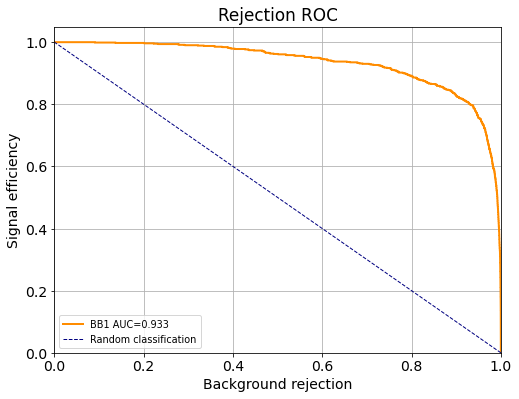

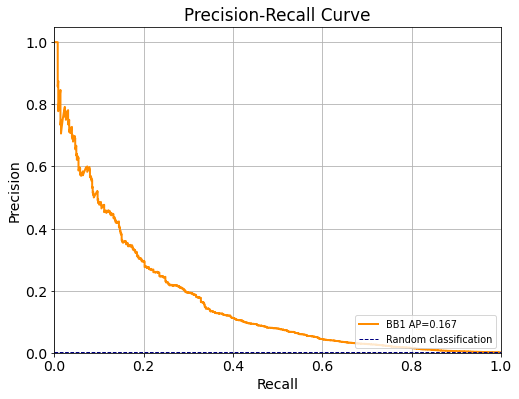

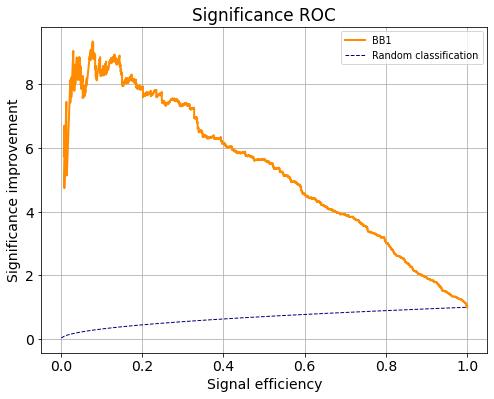

In [11]:
from benchtools.src.metrictools import rejection_plot, precision_recall_plot, significance_plot

plt.rc('legend',fontsize='x-small')

rejection_plot(names='BB1', labels=df_sig.loc[:,'label'], probs=df_sig.loc[:,'y_score'])
plt.show()

precision_recall_plot(names='BB1', labels=df_sig.loc[:,'label'], probs=df_sig.loc[:,'y_score'])
plt.show()

significance_plot(names='BB1', labels=df_sig.loc[:,'label'], probs=df_sig.loc[:,'y_score'])
plt.show()

This agrees with the obtained result from the training:
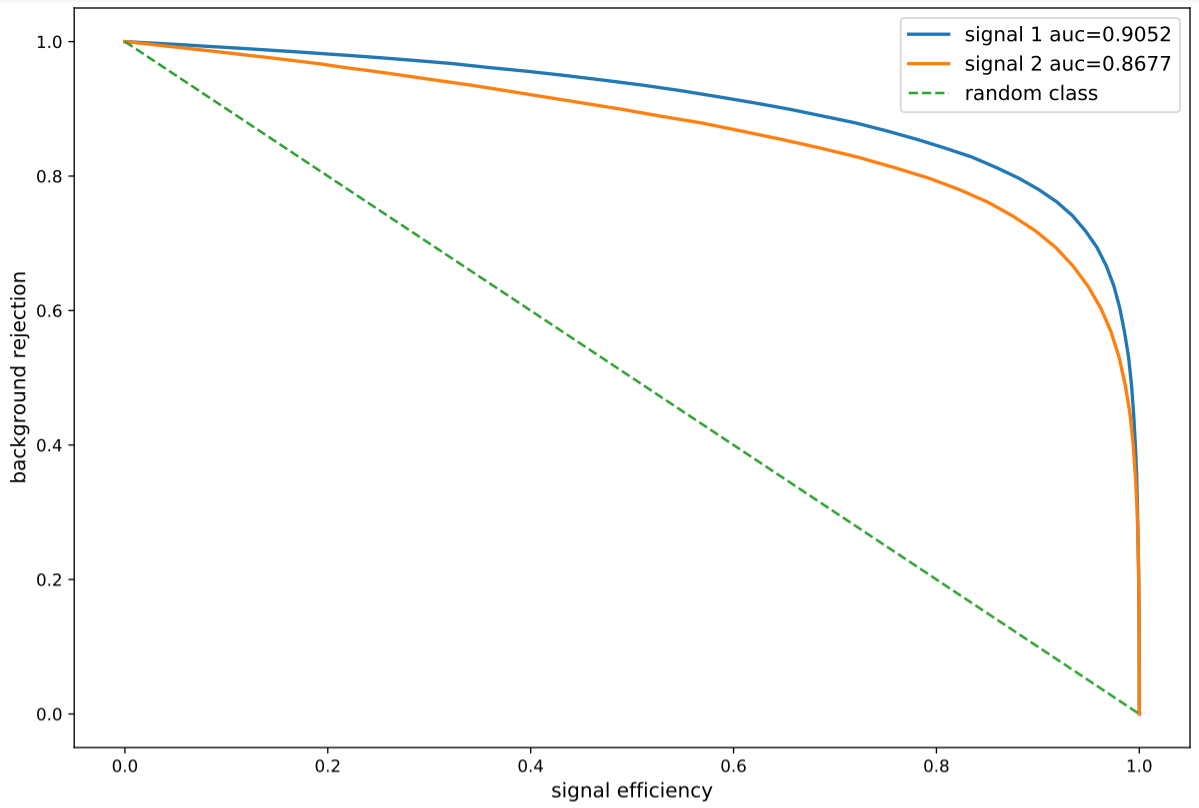

### Signal efficiency vs. rejection

In [20]:
def roc_curve_and_score(label, pred_proba):
    '''Returns the false positive rate (fpr), true positive rate(tpr) and
    the area under the curve (auc) of the ROC curve.
    Parameters
    ----------
    label : ndarray
        True binary labels.
    pred_proba : ndarray
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.
    Returns
    ------
    fpr: ndarray
        False positive rate.
    tpr: ndarray
        True positive rate.
    auc: float
        AUC score.
    '''
    fpr, tpr, _ = roc_curve(label.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(label.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

In [41]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, log_loss, recall_score, classification_report, f1_score, average_precision_score
LIST_COLORS = ['darkorange', 'crimson', 'green', 'blue', 'green'
    , 'red', 'purple', 'pink', 'gray', 'olive', 'cyan', 'indigo'
    ,'salmon','gold', 'aquamarine', 'bluevioles', 'magenta', 'darkred'
    ,'sandybrown', 'darkseagreen','deepskyblue', 'deeppink']

def inverse_roc_plot(names, labels, probs, colors=LIST_COLORS):
    
    '''Plots the signal efficiency (tpr) vs. rejection (1/fpr).
    Parameters
    ----------
    names : string or list of strings
        Name of the algorithms.
    labels: ndarray or list of ndarrays
        True label of every event.
    probs : ndarray or list of ndarrays
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.
    colors: list 
        List of specific colors for the curves (default is LIST_COLORS)
        
    Returns
    ------
    ax:
        The axis for the plot.
    '''
    # To ignore division by zero error
    np.seterr(divide='ignore')

    # For plotting one curve
    if type(probs) is not list:
        # Creating the figure an the axis
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(1, 1, 1)

        # Setting some parameters
        matplotlib.rcParams.update({'font.size': 14})
        plt.grid()
        
        # In case there is no selected color
        if type(colors) is not str:
            colors = LIST_COLORS[0]

        # Plotting the curve
        fpr, tpr, _ = roc_curve_and_score(labels, probs)
        plt.plot(tpr, 1/fpr, color=colors, lw=2, label='{}'.format(names))

    # Multiple curves
    else: 
        # Creating the figure an the axis
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(1, 1, 1)

        # Setting some parameters
        matplotlib.rcParams.update({'font.size': 14})
        plt.grid()
        
        # Plotting the curves
        # Different labels
        if type(labels)==list:
            for name, label, prob, color in zip(names, labels, probs, colors):
                fpr, tpr, _ = roc_curve_and_score(label, prob)
                plt.plot(tpr, 1/fpr, color=color, lw=2, label='{}'.format(name))

        # Same labels
        else:
            for name, prob, color in zip(names, probs, colors):
                fpr, tpr, _ = roc_curve_and_score(labels, prob)
                plt.plot(tpr, 1/fpr, color=color, lw=2, label='{}'.format(name))

    # Adding information to the plot
    #plt.yticks(np.arange(0, 30000, 5000))
    # Set label locations.
    plt.legend(loc="upper right")
    plt.xlabel('Signal efficiency')
    plt.ylabel('Rejection')
    plt.title('Inverse ROC')
    #ax.set_ylim([0, 10**6])
    
    return ax

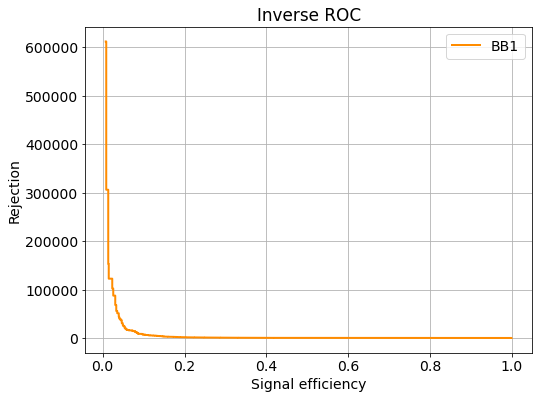

In [42]:
inverse_roc_plot(names='BB1', labels=df_sig.loc[:,'label'], probs=df_sig.loc[:,'y_score'])
plt.show()

### Improvement significance

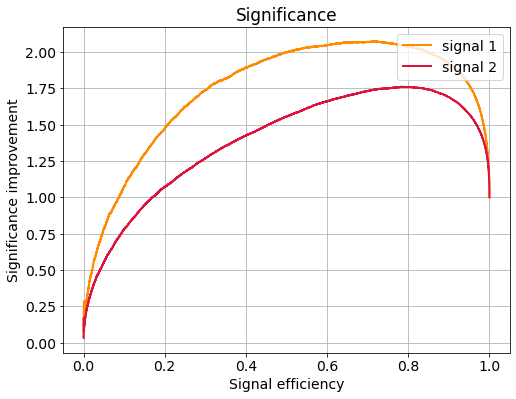

In [11]:
significance_plot(names=names, labels=labels, probs=scores, colors=colors)
plt.show()

### Precision vs. recall
This curve is better for data that is highly imbalanced

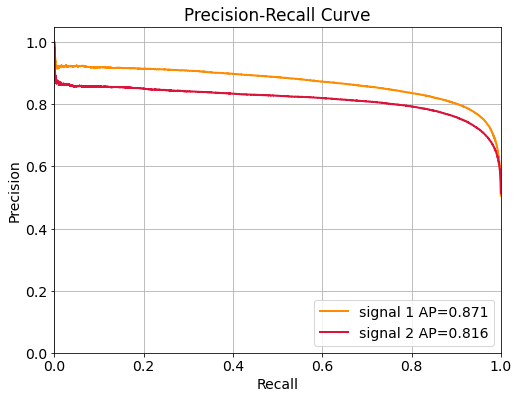

In [12]:
precision_recall_plot(names=names, labels=labels, probs=scores, colors=colors)
plt.show()

## Metrics
Here, I'll get the best thresholds for each signal and use them to calculate the metrics

In [13]:
from benchtools.src.metrictools import optimal_threshold
threshold1 = optimal_threshold(labels[0], scores[0])
threshold2 = optimal_threshold(labels[1], scores[1])

print('Optimal thresholds: sig1 {0:.3}, sig2 {0:.3}'.format(threshold1, threshold2))

Optimal thresholds: sig1 0.706, sig2 0.706


In [14]:
df_sig1['y_pred']=(df_sig1['y_score'] >= threshold1).astype(float)
df_sig2['y_pred']=(df_sig2['y_score'] >= threshold2).astype(float)

log_cols=["Classifier", "Precision", "Recall", "F1 score"]
log = pd.DataFrame(columns=log_cols)

preds = [df_sig1.loc[:,'y_pred'], df_sig2.loc[:,'y_pred']]

for name, label, pred in zip(names, labels, preds):
    log_entry = performance_metrics(name, label, pred, pred_prob=None)
    log = log.append(log_entry)

log

signal 1
****Results****
              precision    recall  f1-score   support

  background       0.89      0.77      0.83    100000
      signal       0.80      0.91      0.85     98494

    accuracy                           0.84    198494
   macro avg       0.85      0.84      0.84    198494
weighted avg       0.85      0.84      0.84    198494

signal 2
****Results****
              precision    recall  f1-score   support

  background       0.87      0.73      0.79    100000
      signal       0.77      0.89      0.82     99077

    accuracy                           0.81    199077
   macro avg       0.82      0.81      0.81    199077
weighted avg       0.82      0.81      0.81    199077



,Classifier,Precision,Recall,F1 score
0,signal 1,79.813745,0.907558,0.849338
0,signal 2,76.532924,0.886381,0.821419


## Functions
Below are the functions from the benchtools package with some changes for plotting two different signals

In [2]:
# I'll copy some functions of the benchtools package because i need to 
# update them for more than 2 classes

from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, log_loss, recall_score, classification_report, f1_score, average_precision_score

def bkg_sig_hist(df, variable, label, xlabel=None, ylabel='Events density', n_bins=50):
    
    # Getting the labels
    labels = df[label].unique()
    colors = ['b','r','y']
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    for integer, color in zip(labels, colors):
    # Plotting the histogramas
        df_plot = df.loc[df.loc[:,label]==integer]
        df_plot = df_plot[variable]
        df_plot.plot.hist(bins=n_bins, facecolor=color, alpha=0.2, label='label {}'.format(integer), density=True)
    
    # Adding information to the plot
    if xlabel != None:
        plt.xlabel(xlabel)
    else: 
        plt.xlabel(variable)
        
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')
    plt.title('Distribution of {}'.format(variable))
    
    return ax

def roc_curve_and_score(label, pred_proba):
    fpr, tpr, thresholds = roc_curve(label, pred_proba)
    roc_auc = roc_auc_score(label, pred_proba)
    return fpr, tpr, roc_auc

def sig_eff_bkg_rej(names, labels, probs, colors):
    # Creating the figure an the axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    # Setting some parameters
    matplotlib.rcParams.update({'font.size': 14})
    plt.grid()
    
    if type(labels)==list:
        for name, label, prob, color in zip(names, labels, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(label, prob)
            plt.plot(1-fpr, tpr, color=color, lw=2,
                    label='{} AUC={:.3f}'.format(name, roc_auc)) 
    else:
        # Plotting the curves
        for name, prob, color in zip(names, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(labels, prob)
            plt.plot(1-fpr, tpr, color=color, lw=2,
                    label='{} AUC={:.3f}'.format(name, roc_auc))

    # Plotting the line for a random classifier
    plt.plot([1, 0], [0, 1], color='navy', lw=1, linestyle='--')

    # Adding the information to the plot
    plt.legend(loc="lower right")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Background rejection')
    plt.ylabel('Signal efficiency')
    plt.title('Signal efficiency vs. Background rejection')

    return ax

def sig_eff_inv_bkg_eff(names, labels, probs, colors=None):
    '''Plots the signal efficiency (tpr) vs. rejection (1/fpr).

    Parameters
    ----------
    names : list
        Name of the algorithms.

    label: serie
        True label of every event.

    probs : list
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.

    colors: list
        List of specific colors for the curves (default is None)
        
    Returns
    ------
    ax:
        The axis for the plot.
    '''
    # To ignore division by zero error
    np.seterr(divide='ignore')

    # Selecting colors in case they weren't specified
    if colors is None:
        colors = LIST_COLORS[:len(names)]

    # Creating the figure an the axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    # Setting some parameters
    matplotlib.rcParams.update({'font.size': 14})
    plt.grid()
    
    if type(labels)==list:
        for name, label, prob, color in zip(names, labels, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(label, prob)
            plt.plot(tpr, 1/fpr, color=color, lw=2,
                     label='{} ROC'.format(name))
    
    else:
        # Plotting the curves
        for name, prob, color in zip(names, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(labels, prob)
            plt.plot(tpr, 1/fpr, color=color, lw=2,
                     label='{} ROC'.format(name))

    # Adding the information to the plot
    plt.legend(loc="upper right")
    plt.xlabel('Signal efficiency')
    plt.ylabel('Rejection')
    plt.title('ROC')
    
    return ax

def significance_plot(names, labels, probs, colors=None):
    '''Plots the signal efficiency (tpr) vs. the significance
    improvement (tpr/sqrt(fpr)).

    Parameters
    ----------
    names : list
        Name of the algorithms.

    label: serie
        True label of every event.

    probs : list
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.

    colors: list
        List of specific colors for the curves (default is None)
        
    Returns
    ------
    ax:
        The axis for the plot.
    '''
    # To ignore division by zero error
    np.seterr(divide='ignore', invalid='ignore')

    # Selecting colors in case they weren't specified
    if colors is None:
        colors = LIST_COLORS[:len(names)]

    # Creating the figure an the axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    # Setting some parameters
    matplotlib.rcParams.update({'font.size': 14})
    plt.grid()
    
    if type(labels)==list:
        for name, label, prob, color in zip(names, labels, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(label, prob)
            plt.plot(tpr, tpr/np.sqrt(fpr), color=color, lw=2,
                     label='{}'.format(name))
    else:        
        # Plotting the curves
        for name, prob, color in zip(names, probs, colors):
            fpr, tpr, roc_auc = roc_curve_and_score(labels, prob)
            plt.plot(tpr, tpr/np.sqrt(fpr), color=color, lw=2,
                label='{}'.format(name))

    # Adding the information to the plot
    plt.legend(loc="upper right")
    plt.xlabel('Signal efficiency')
    plt.ylabel('Significance improvement')
    plt.title('Significance')
    
    return ax

def pr_curve_and_score(label, pred_proba):
    """Returns the precision, recall and the average precision (ap) 
    score for the precision-recall curve (PRc)
    Parameters
    ----------
    label : serie
        True binary labels.
    pred_proba : serie
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.
    Returns
    ------
    fpr: 
        ndarray of shape (>2,)
    tpr:
        ndarray of shape (>2,)
    auc:
        float
    """
    precision, recall, _ = precision_recall_curve(label, pred_proba)
    ap_score = average_precision_score(label, pred_proba)

    return precision, recall, ap_score

def precision_recall_plot(names, labels, probs, colors):
    """Plots precision vs. recall for different decision tresholes.
    Parameters
    ----------
    names : list
        Name of the algorithms.
    label: serie
        True label of every event.
    probs : list
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions.
    colors: list
        List of colors for the curves.
    Returns
    ------
    ax:
        The axis for the plot.
    """
    # Creating the figure an the axis
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)
    # Setting some parameters
    matplotlib.rcParams.update({'font.size': 14})
    plt.grid()

    if type(labels)==list:
        for name, label, prob, color in zip(names, labels, probs, colors):
            precision, recall, ap_score = pr_curve_and_score(label, prob)
            plt.plot(recall, precision, color=color, lw=2,
            label='{} AP={:.3f}'.format(name,ap_score))
    else:
    # Plotting the curves
        for name, prob, color in zip(names, probs, colors):
            precision, recall, ap_score = pr_curve_and_score(labels, prob)
            plt.plot(recall, precision, color=color, lw=2,
             label='{} AP={:.3f}'.format(name,ap_score))

    # Plotting the line for a random classifier
    plt.plot([0, 0], [0, 0], color='navy', lw=1, linestyle='--')
    
    # Adding the information to the plot
    plt.legend(loc="lower right")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    
    return ax

def performance_metrics(name, label, pred_label, pred_prob=None):
    """Calculates the recall, precision, f1 score and logarithmic loss.
    Prints a classification report.
    Parameters
    ----------
     name: string
        Name of the classificator.
    label : serie
        True label of every event.
    pred_label: serie
        Predicted label for every event.
    
    pred_prob: serie
        Target scores, can either be probability estimates of the positive class, 
        confidence values, or non-thresholded measure of decisions. Default is None
    Returns
    ------
    DataFrame
        DataFrame with the name, recall, precision, f1 score.
        Logarithmic loss if pred_prob was passed.
    """

    print("="*30)
    print(name)

    print('****Results****')

    # Calculating metrics
    precision = precision_score(label, pred_label)
    f1 = f1_score(label, pred_label)
    recall = recall_score(label, pred_label)
    if pred_prob!=None: 
        ll = log_loss(label, pred_prob)
        # Naming the columns
        log_cols=["Classifier", "Recall", "Precision", "F1 score", "Log Loss"]
        # Inserting the data in the dataframe
        log_entry = pd.DataFrame([[name, recall, precision*100, f1, ll]], columns=log_cols)
    else:
        log_cols=["Classifier", "Recall", "Precision", "F1 score"]
        # Inserting the data in the dataframe
        log_entry = pd.DataFrame([[name, recall, precision*100, f1]], columns=log_cols)

    # Print the report
    print(classification_report(label, pred_label, target_names=['background','signal']))

    return log_entry